# Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [84]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\7_Loan\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [111]:
df.shape

(614, 12)

In [86]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [87]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Some of the cloumns have null values

## Treating Null Values

In [88]:
df["Gender"].fillna(df["Gender"].mode(),inplace=True)

In [89]:
df["Married"].fillna(df["Married"].mode(),inplace=True)

In [90]:
df["Dependents"].fillna(df["Dependents"].mode(),inplace=True)

In [91]:
df["Self_Employed"].fillna(df["Self_Employed"].mode(),inplace=True)

In [92]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [93]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode().values[0],inplace=True)

In [94]:
df["Credit_History"].fillna(df["Credit_History"].mode().values[0],inplace=True)

## Encoding

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
objList = df.select_dtypes(include = "object").columns

In [97]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

## Seperating Loan_Status

In [98]:
dfR=df["Loan_Status"]

In [99]:
df.drop(columns={"Loan_Status"},inplace=True)

## Scaling the data

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

## Adding Loan_Status column again

In [101]:
frames = [df, dfR]

df = pd.concat(frames,axis=1)

# EDA

## Distplot

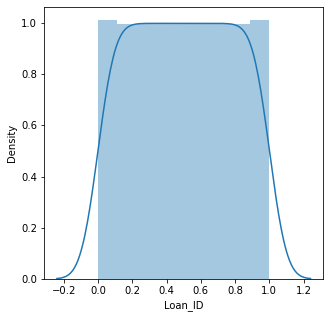

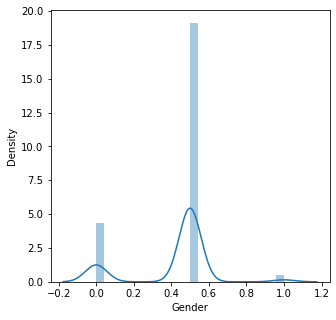

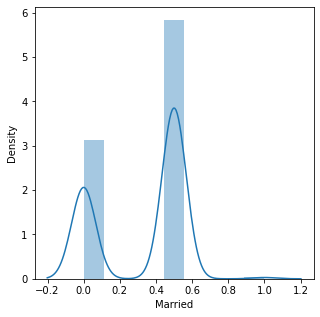

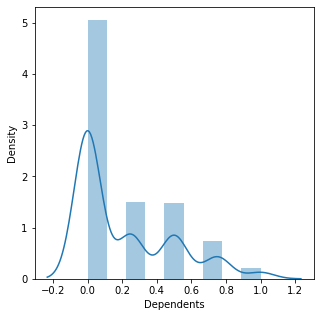

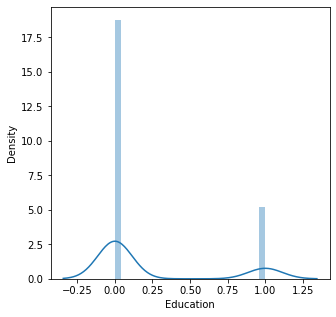

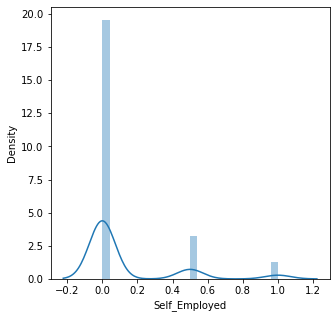

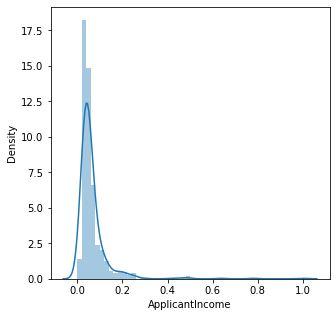

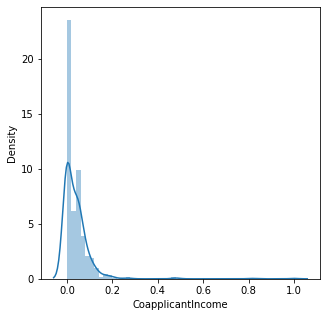

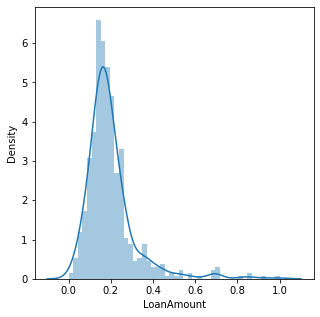

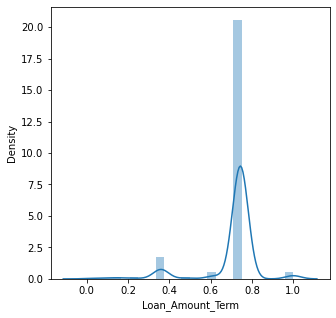

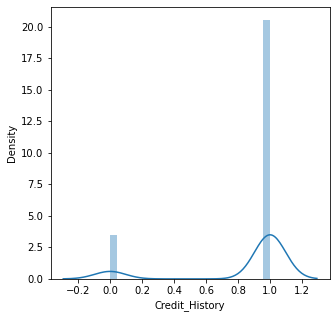

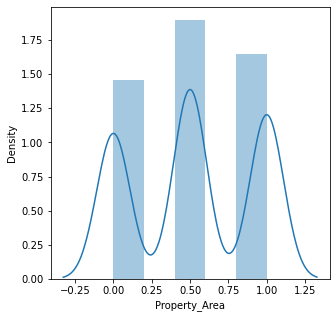

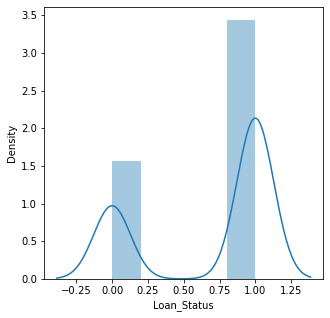

In [103]:
for column in df:
    plt.figure(figsize=(5,5))
    sn.distplot(df[column])

Some Skewness is present in various columns which we will handle later.

## Boxplot

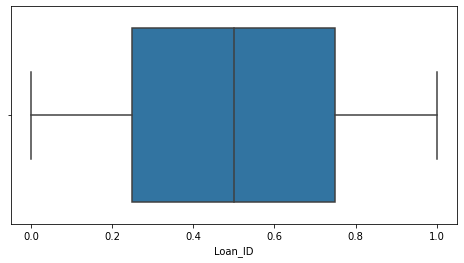

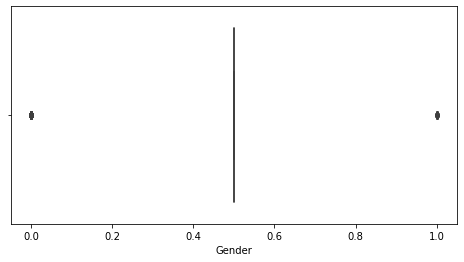

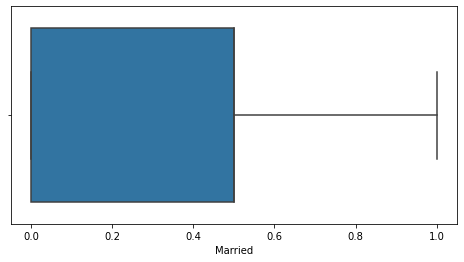

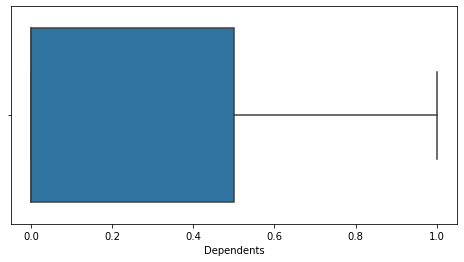

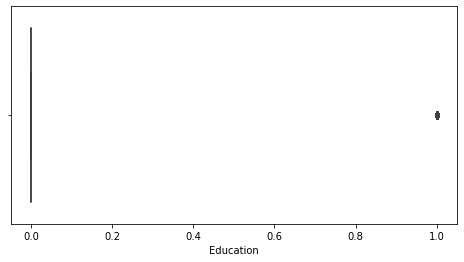

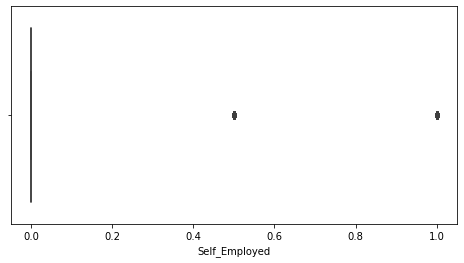

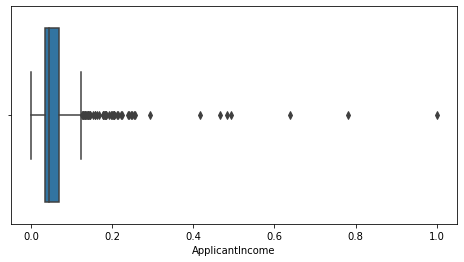

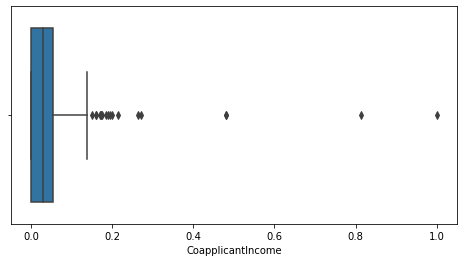

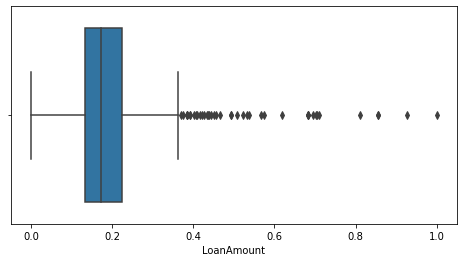

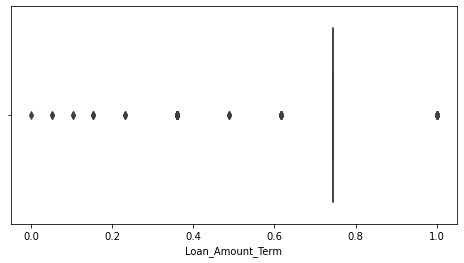

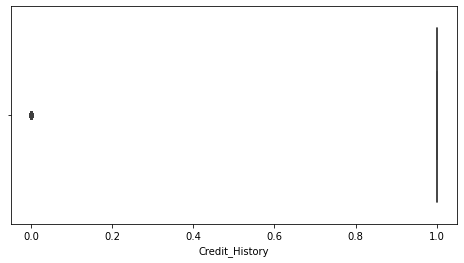

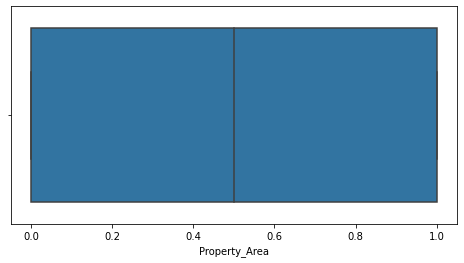

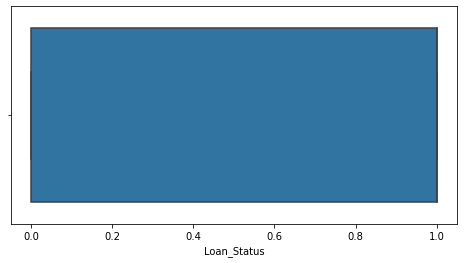

In [104]:
for column in df:
    plt.figure(figsize=(8,4))
    sn.boxplot(x=column,data=df)

Some columns have a high amount of outliers in them

## Pairplot

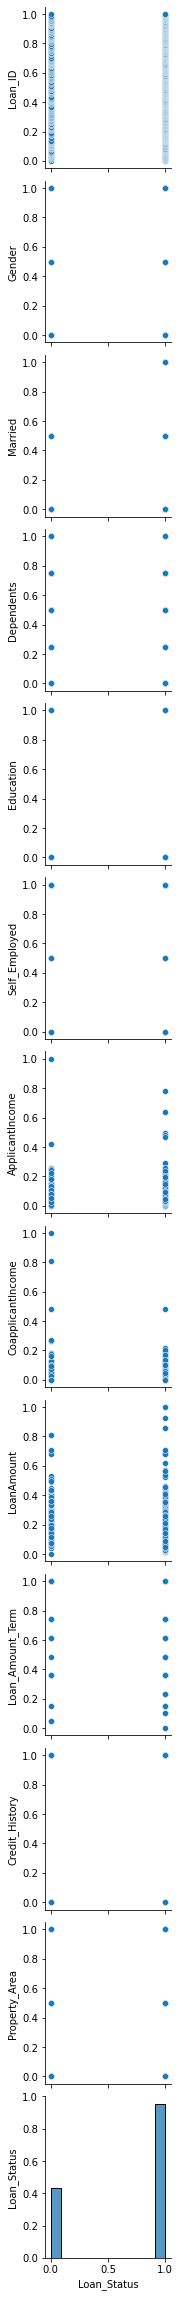

In [105]:
sn.pairplot(data=df,
            x_vars=['Loan_Status'],
            y_vars=df.columns)

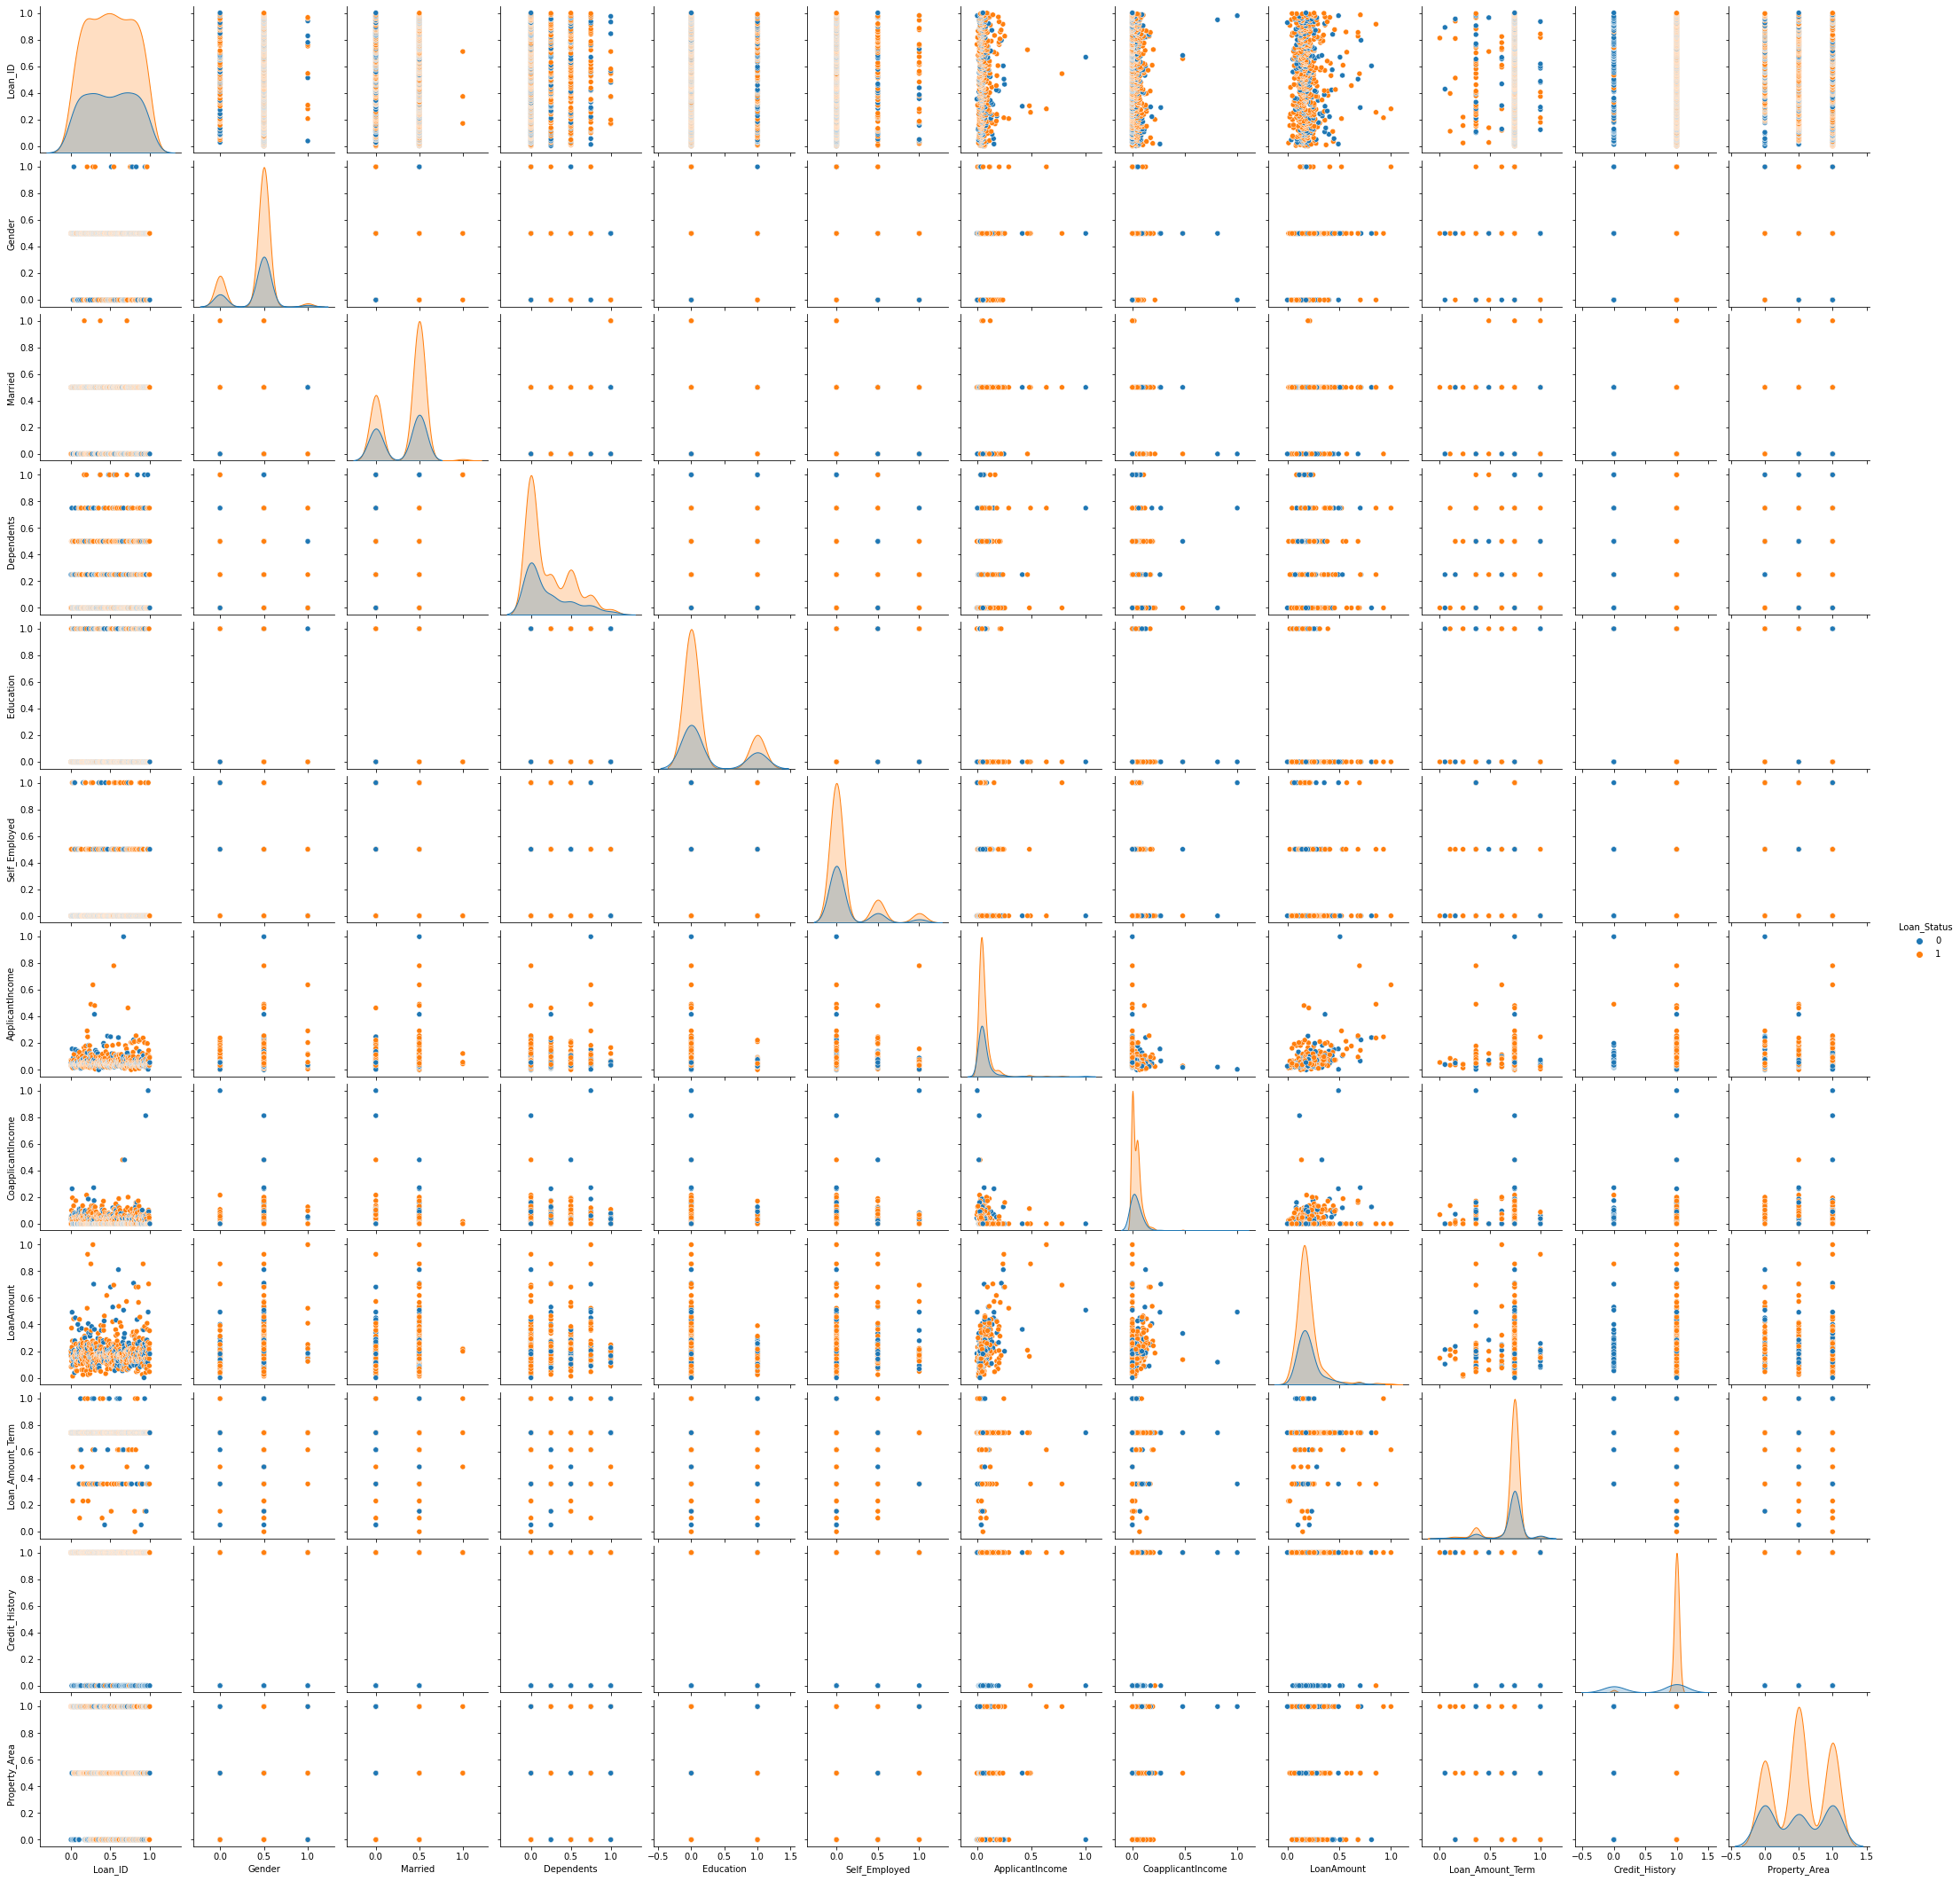

In [106]:
sn.pairplot(data=df,hue="Loan_Status")

## Heatmap

In [108]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.016925,0.039211,0.035684,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.068522,-0.003844,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096368,0.014896,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.075159,-0.082888,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036361,0.062019,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.068522,-0.096368,-0.075159,-0.073928,-0.036361,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549


<AxesSubplot:>

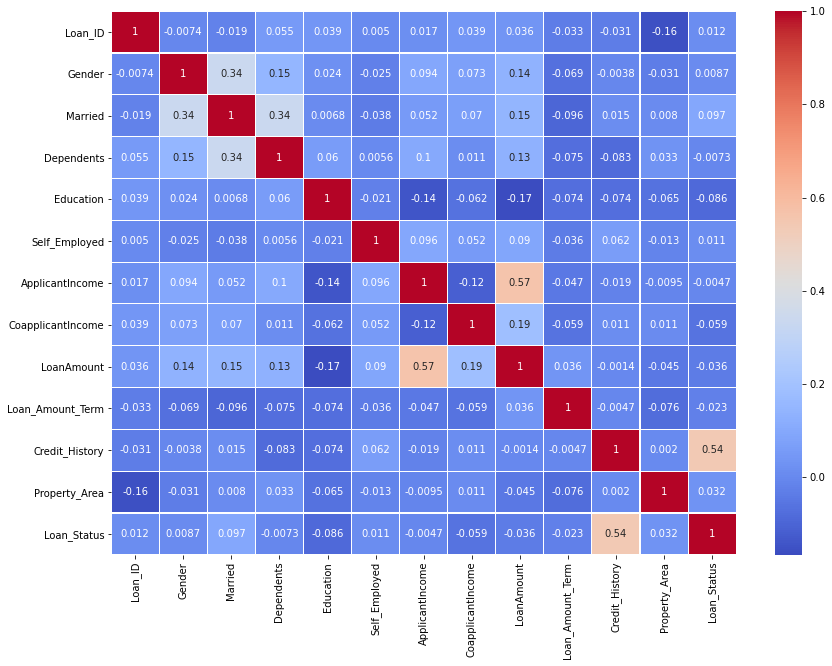

In [109]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

Credit_history is highly correlated with out target variable

ApplicantIncome and LoanAmount are highly correlated to each other so we are going to delete ApplicantIncome

In [110]:
df.drop(columns={"ApplicantIncome"},inplace=True)

## Checking the classes is balanced or not

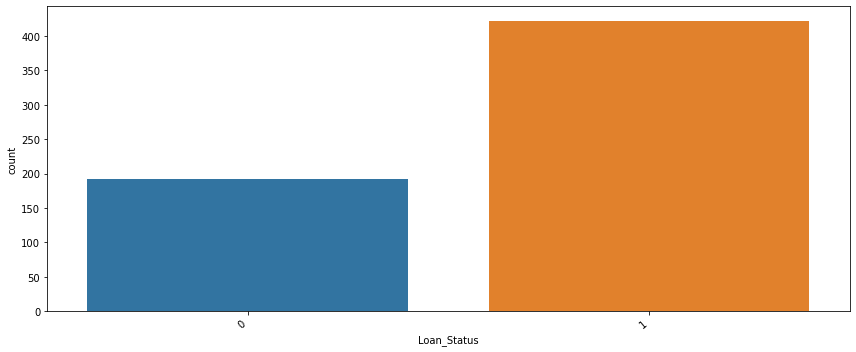

In [117]:
plt.figure(figsize=(12,5))
ax=sn.countplot(df["Loan_Status"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We have to balance the classes

# Removing Outliers

In [118]:
from scipy.stats import zscore

In [119]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [120]:
df.shape

(553, 12)

# Skewness Removal

In [121]:
df.skew()

Loan_ID              0.010184
Gender              -0.947686
Married             -0.533948
Dependents           1.113740
Education            1.313549
Self_Employed        2.157009
CoapplicantIncome    1.367991
LoanAmount           1.184705
Loan_Amount_Term    -2.064563
Credit_History      -1.906329
Property_Area       -0.051026
Loan_Status         -0.809536
dtype: float64

In [123]:
from scipy.stats import boxcox

### Gender

In [127]:
g=boxcox(df["Gender"]+1)[0]
pd.Series(g).skew()

0.24364968005304685

In [128]:
df["Gender"]=g

### Dependents

In [131]:
d=boxcox(df["Dependents"]+1)[0]
pd.Series(d).skew()

0.4506397741465617

In [132]:
df["Dependents"]=d

### Education

In [138]:
n2=np.log(df["Education"]+1)
n2.skew()

1.313548894201421

### Self_Employed

In [141]:
n2=np.sqrt(df["Self_Employed"])
n2.skew()

2.1570087771502022

### CoapplicantIncome

In [143]:
co=np.sqrt(df["CoapplicantIncome"])
co.skew()

0.23811406591414358

In [144]:
df["CoapplicantIncome"]=co

### LoanAmount

In [146]:
la=np.sqrt(df["LoanAmount"])
la.skew()

0.24343581282052382

In [147]:
df["LoanAmount"]=la

### Loan_Amount_Term

In [150]:
lat=boxcox(df["Loan_Amount_Term"]+1)[0]
pd.Series(lat).skew()

0.6407492436534966

In [151]:
df["Loan_Amount_Term"]=lat

### Credit_History

In [153]:
la=np.sqrt(df["Credit_History"])
la.skew()

-1.9063288280004924

# Input Splitting

In [154]:
x=df.drop(["Loan_Status"],axis=1)

In [155]:
y=df["Loan_Status"]

# Oversampling our data

In [156]:
from imblearn.over_sampling import RandomOverSampler

In [157]:
ros=RandomOverSampler(random_state=0)

In [158]:
x,y=ros.fit_resample(x,y)

# Finding The Best Model

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [166]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [167]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 71.49122807017544
CV Score: 55.78947368421052
Diffrence: 15.701754385964918


In [168]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 70.76023391812866
CV Score: 67.5
Diffrence: 3.2602339181286624


In [169]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 71.49122807017544
CV Score: 58.289473684210535
Diffrence: 13.201754385964904


In [170]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 68.27485380116958
CV Score: 68.6842105263158
Diffrence: 0.40935672514621047


In [171]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 75.43859649122807
CV Score: 79.47368421052632
Diffrence: 4.035087719298247


KNeighborsClassifier  is our Best Model

# Hyper parameter tuning

In [172]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [173]:
from sklearn.model_selection import GridSearchCV

In [181]:
params = {'leaf_size': [10,20,30,40,50,60],
          'algorithm': ['auto','sqrt','log10'],
         'n_neighbors': [1,2,3,4,5,6,7],
         'weights' : ['uniform','distance'],
         'metric' : ['minkowski','euclidean','manhattan']}

In [182]:
gs = GridSearchCV(KNN, params, verbose = 1, cv=3, n_jobs = -1)

In [183]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'sqrt', 'log10'],
                         'leaf_size': [10, 20, 30, 40, 50, 60],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [184]:
gs.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_neighbors': 7,
 'weights': 'distance'}

# Checking Accuracy Score

In [185]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [187]:
KNN=KNeighborsClassifier(algorithm='auto',
 leaf_size= 10,
 metric= 'minkowski',
 n_neighbors= 7,
 weights= 'distance')

In [188]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=7, weights='distance')

In [189]:
KNN.score(X_test,Y_test)

0.6812865497076024

In [190]:
y_test_pred=ETC.predict(X_test)

In [191]:
print(ETC.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [192]:
import joblib
joblib.dump(ETC,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\7_Loan\loan_status.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\7_Loan\\loan_status.pkl']